In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import cartopy.crs as ccrs 
from matplotlib import ticker, cm
import csv

In [2]:
accidents_uned = pd.read_csv(".\Accidents_June20.csv")

In [34]:
# source: https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-rev11/data-download
# NASA: socioeconomic data and applications center (SEDAC)
pop = np.genfromtxt(".\popdensity3\gpw_v4_population_density_rev11_2020_2pt5_min.asc", skip_header=6)

# betere resolutie (maar niet genoeg memory op pc)
#pop = np.genfromtxt(".\popdensity\gpw_v4_population_density_rev11_2020_30_sec_1.asc", skip_header=6)

In [35]:
lons = np.arange(-180,180,360/np.shape(pop)[1])
lats = np.arange(90,-90,-180/np.shape(pop)[0])

In [36]:
masked_pop = np.ma.masked_where(pop == -9999,pop)

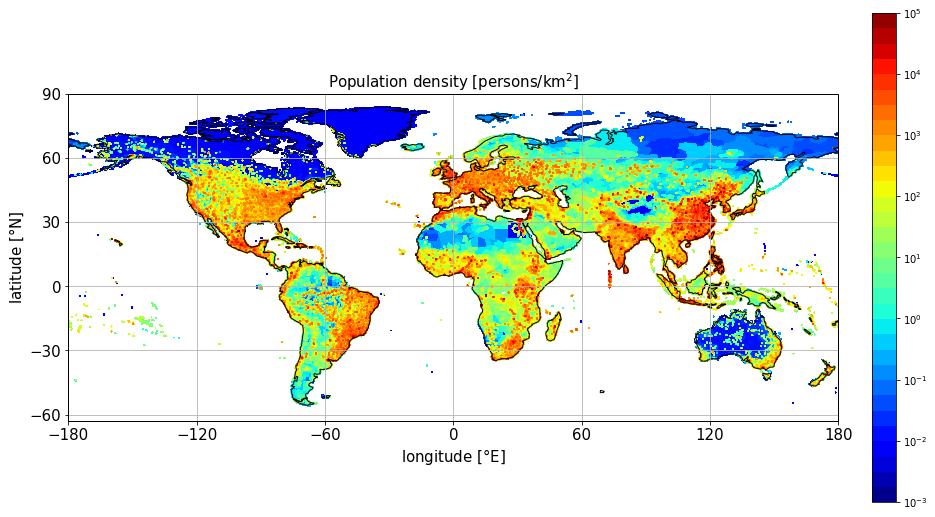

In [37]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

#ax.stock_img()
ax.coastlines()
plt.xticks(np.arange(-180,181,60), fontsize=15)  
plt.yticks(np.arange(-90,91,30), fontsize=15) 
CS = plt.contourf(lons,lats,masked_pop+0.01,cmap=plt.cm.jet, locator=ticker.LogLocator(), levels=np.logspace(-3,5,33))
for c in CS.collections:
    c.set_edgecolor("face")
plt.xlim(-180,180)
#plt.ylim(20,60)
plt.xlabel('longitude [$\degree$E]', fontsize=15)
plt.ylabel('latitude [$\degree$N]', fontsize=15)
plt.title('Population density [persons/km$^2$]', fontsize=15)
plt.grid(True)
plt.colorbar(fraction=0.040, pad=0.04)

# January
plt.show()

In [3]:
# mogelijkheden:
# Tijd: start time, end time, sunset, twilight
# De locatie: GPS coordinates, Country, State, Street, City, zipcode
# Het weer: temp, chill, humidity, pressure, visibility, wind_dir, wind_speed, precip, weath_condition
# speed limit/bevolkings dichtheid/soort weg (snelweg etc)
# https://developer.mapquest.com/documentation/traffic-api/incidents/post/

In [4]:
pd.set_option('display.max_columns', None)
accidents_uned.head(50)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,NaN,Westerville Rd,R,Westerville,Franklin,OH,43081,US,US/Eastern,KCMH,2016-02-08 07:51:00,37.9,35.5,97.0,29.63,7.0,SSW,3.5,0.03,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,376.0,N Woodward Ave,R,Dayton,Montgomery,OH,45417-2476,US,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,NaN,N Main St,R,Dayton,Montgomery,OH,45405,US,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,99.0,Notre Dame Ave,L,Dayton,Montgomery,OH,45404-1923,US,US/Eastern,KFFO,2016-02-08 07:58:00,33.3,NaN,99.0,29.67,5.0,SW,1.2,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,MapQuest,201.0,3,2016-02-08 08:10:04,20

In [5]:
accidents_uned.columns
# stad vs platteland:
# gebeuren er meer ongelukken dag/nacht stad/land
# gebeuren er meer ongelukken onder bepaalde weersomstandigheden in de stad/land
# gebeuren er meer ongelukken op bijvoorbeeld kruispunten in stad/land (en dat voor allerlei verkeersobjecten)
# filter database op categorien (bevolkingsdichtheid)

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

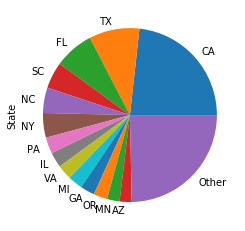

In [6]:
cap_state = 0.02
state_counts = accidents_uned["State"].value_counts()
state_counts_capped = state_counts[state_counts/state_counts.sum() > cap_state]
state_counts_capped["Other"] = state_counts[state_counts/state_counts.sum() < cap_state].sum()
state_counts_capped.plot.pie()
plt.show()

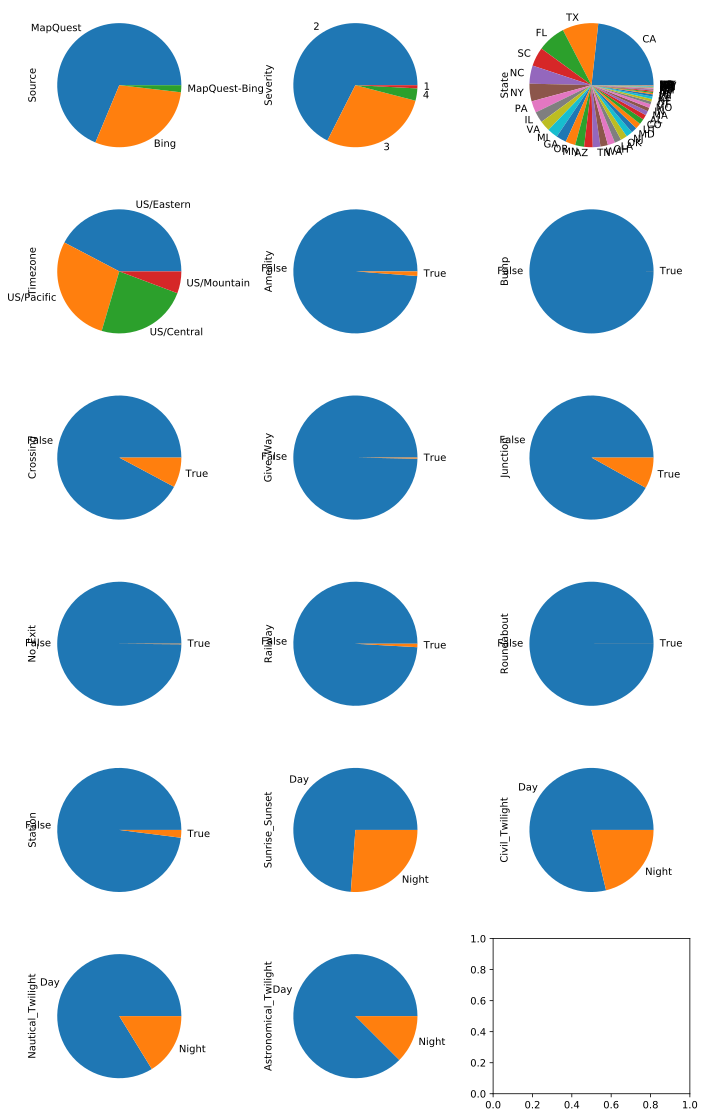

In [7]:
%config InlineBackend.figure_format = 'svg'
fig, axs = plt.subplots(6,3, figsize=(12,20))

cols = [1,3,17,20,32,33,34,35,36,37,38,39,40,45,46,47,48]

for i,col in enumerate(accidents_uned.columns[cols]):
    accidents_uned[col].value_counts().plot.pie(ax=axs[int(i/3),i%3])

plt.show()
#fig.savefig("./pieplots",dpi=200)

In [8]:
accidents_uned["Roundabout"].value_counts()

False    3513433
True         184
Name: Roundabout, dtype: int64

In [46]:
# hier ook memory issues denk ik
#accidents_datetimes = [datetime.strptime(x,'%Y-%m-%d %X') for x in accidents_uned["Start_Time"]]